Please work on Google Colab.

### 1. Load the MNIST dataset and create a CNN model

- load the MNIST dataset from the tensorflow/keras built-in dataset (just like last time)
- use the original train/test split!
- divide each pixel's value by 255 and now do not reshape, leave it as is (2D matrix (28x28) )
- eg for the test set you will have a (10000, 28, 28) shaped vector
- train the following network on the training set and generate prediction for the 10.000 test images:

        input (28, 28)
        conv2D, 16 kernels, kernel size = 3, valid padding, relu activation
        conv2D, 16 kernels, kernel size = 3, valid padding, relu activation
        maxpooling kernel size = 2*2
        conv2D, 32 kernels, kernel size = 3, valid padding, relu activation
        conv2D, 32 kernels, kernel size = 3, valid padding, relu activation
        maxpooling kernel size = 2*2
        flatten
        dense, 10 neurons, softmax activation
    * pay attention to channel format, you will need to expand dims!
    * how many parameters do we have for each layer?
    * use Adam optimizer with default parameters
    * use categorical crossentropy as loss function
    * compile the model
    * print out a summary of the model
    * train the CNN on the training data for 5 epochs with batch size of 32
    * use the test data as validation data
        
- calculate the categorical cross-entropy loss and the accuracy! Hint: you should get at least ~98% accuracy
- show the confusion matrix of the predictions (predicted values vs actual labels)
- where does the model make mistakes? Where does it improve compared to fully connected nets?

### 2. Download the Street View House Numbers (SVHN) Dataset

- source: http://ufldl.stanford.edu/housenumbers/
- use the cropped dataset!
- to get the dataset use eg. wget and keep the original splitting, so download train and test matrix files
- preprocess the downloaded data to be able to use it for training and testing, so shapes should be same (except image sizes) as it was in ex 1.
- how many classes do we have in the dataset? how many train and test examples do we have?
- what is the dimension of the images?
- show 5 images from the dataset
- make one-hot encoding for the labels

### 3. Train the CNN model seen in the 1st exercise for this dataset
* create a convolutional neural network
* the network should have the following layers:
        
        input (32, 32, 3)
        conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
        conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
        maxpooling kernel size = 2*2
        conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
        conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
        maxpooling kernel size = 2*2
        flatten
        dense, 10 neurons, softmax activation
        how many parameters do we have for each layer?

    * use Adam optimizer with default parameters
    * use categorical crossentropy as loss function
    * compile the model
    * print out a summary of the model
    * train the CNN on the training data for 15 epochs with batch size of 32
    * use the test data as validation data
- calculate the categorical cross-entropy loss and the accuracy! Hint: you should get at least ~80-90% accuracy

### 4. Evaluate performance

- plot the training and the validation loss on the same plot!
- plot the training and the validation accuracy on the same plot!
- do we overfit?
- show the confusion matrix of the predictions (predicted values vs actual labels)
- where does the model make mistakes?

### 5. Train an other CNN
- as we can see the previous architecture can be further improved
- come up with an architecture that can achieve more than 91% accuracy on the test set
- print out the summary for this model!
- plot the loss and accuracy curves for this model too!

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

# Solutions

## 1. Load the MNIST dataset and create a CNN model

- load the MNIST dataset from the tensorflow/keras built-in dataset (just like last time)
- use the original train/test split!
- divide each pixel's value by 255 and now do not reshape, leave it as is (2D matrix (28x28) )
- eg for the test set you will have a (10000, 28, 28) shaped vector
- train the following network on the training set and generate prediction for the 10.000 test images:

        input (28, 28)
        conv2D, 16 kernels, kernel size = 3, valid padding, relu activation
        conv2D, 16 kernels, kernel size = 3, valid padding, relu activation
        maxpooling kernel size = 2*2
        conv2D, 32 kernels, kernel size = 3, valid padding, relu activation
        conv2D, 32 kernels, kernel size = 3, valid padding, relu activation
        maxpooling kernel size = 2*2
        flatten
        dense, 10 neurons, softmax activation
    * pay attention to channel format, you will need to expand dims!
    * how many parameters do we have for each layer?
    * use Adam optimizer with default parameters
    * use categorical crossentropy as loss function
    * compile the model
    * print out a summary of the model
    * train the CNN on the training data for 5 epochs with batch size of 32
    * use the test data as validation data
        
- calculate the categorical cross-entropy loss and the accuracy! Hint: you should get at least ~98% accuracy
- show the confusion matrix of the predictions (predicted values vs actual labels)
- where does the model make mistakes? Where does it improve compared to fully connected nets?

In [19]:
num_classes = 10
input_shape = (28, 28, 1) #height and width of the pictures and the number of channels

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#normalizing the data
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#taking the number of channels into account
x_train = np.expand_dims(x_train, -1) 
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3),padding="valid", activation="relu"),
        layers.Conv2D(16, kernel_size=(3, 3),padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
        ])

batch_size = 1000 #I greatly increased the batch size, because it'd take a lot more time otherwise
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data = (x_test,y_test))

Epoch 1/5
60/60 [==============================] - 24s 407ms/step - loss: 0.9272 - accuracy: 0.7394 - val_loss: 0.2770 - val_accuracy: 0.9166
Epoch 2/5
60/60 [==============================] - 24s 404ms/step - loss: 0.2271 - accuracy: 0.9317 - val_loss: 0.1536 - val_accuracy: 0.9558
Epoch 3/5
60/60 [==============================] - 24s 408ms/step - loss: 0.1434 - accuracy: 0.9568 - val_loss: 0.1062 - val_accuracy: 0.9683
Epoch 4/5
60/60 [==============================] - 24s 407ms/step - loss: 0.1057 - accuracy: 0.9683 - val_loss: 0.0832 - val_accuracy: 0.9737
Epoch 5/5
60/60 [==============================] - 25s 412ms/step - loss: 0.0843 - accuracy: 0.9743 - val_loss: 0.0735 - val_accuracy: 0.9775


In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0735 - accuracy: 0.9775


[0.07346093654632568, 0.9775000214576721]

In [21]:
#Number of model parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

Text(0.5, 1.0, 'convolutional network - confusion matrix')

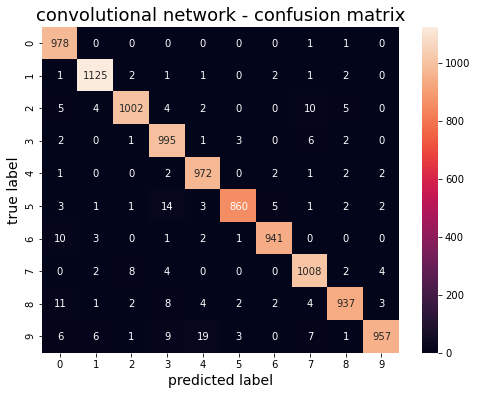

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matr = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(x_test),axis=1))
conf_matr = pd.DataFrame(conf_matr, index = np.arange(0,10),
                  columns = np.arange(0,10))
plt.figure(figsize=[8,6])
sns.heatmap(conf_matr, annot = True,  fmt = ".0f")
plt.xlabel("predicted label",size=14)
plt.ylabel("true label", size=14)
plt.title("convolutional network - confusion matrix",size=18)



![Dense network's confusion matrix](keras_dense.png)

Comparing this convolutional network to the last homework's dense network we can conclude, that in nearly every case (except for 1, 2 and 7) so we got generally better predictions with the convolutional network. We had less misclassifications in the case of 3-8 (which are quite similar), although there are more faults with 2-7. Below I plotted some of the misclassified numbers.


In [23]:
misclassified = np.argwhere(np.argmax(y_test,axis=1) != np.argmax(model.predict(x_test),axis=1))

#source: example notebook with some modificiations
def show_misclassified(n=5,m=5):
    for j in range(m):
        plt.figure(figsize=[n*5,m*5])
        x_miscls = x_test[misclassified].reshape(-1,28,28,1)
        y_miscls = y_test[misclassified].reshape(-1,10)
        
        idx_start = np.random.randint(len(x_miscls) - n)
        preds = model.predict(x_miscls[idx_start:idx_start+5])
        true_labels = np.argmax( y_miscls[idx_start:idx_start+5], axis=1)

        for i in range(n):
            plt.subplot(int('1' + str(n) + str(i+1)))
            predstr = 'pred: ' + str(preds[i].argmax()) + ', prob: ' + str(int(np.round(preds[i].max()*100,0))) + '%'
            plt.title(predstr + ' / true: ' + str(true_labels[i]),fontsize=15)
            plt.imshow(x_miscls[idx_start+i].reshape(28, 28)*255, cmap='gray')
            plt.axis('off')
        plt.show()

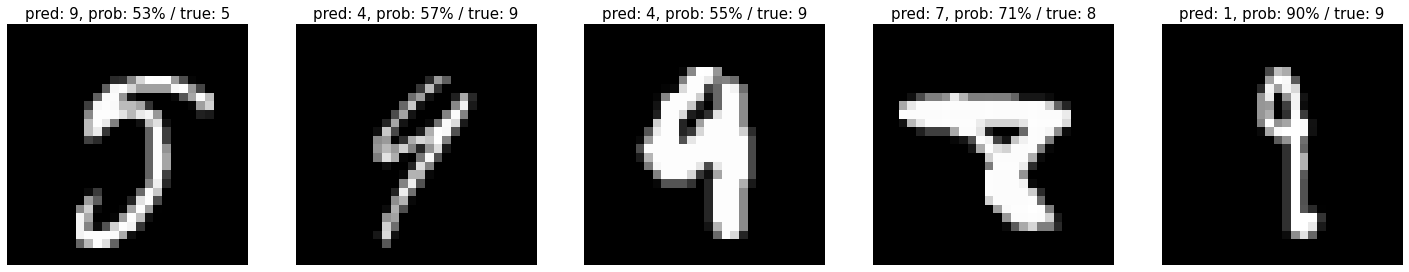

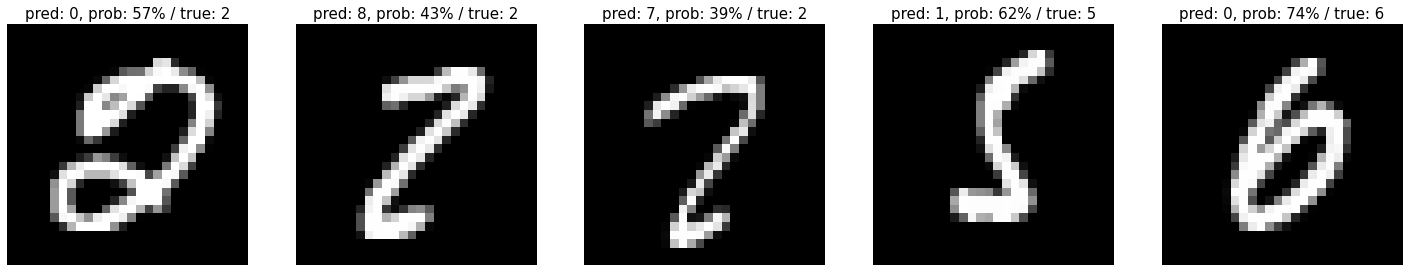

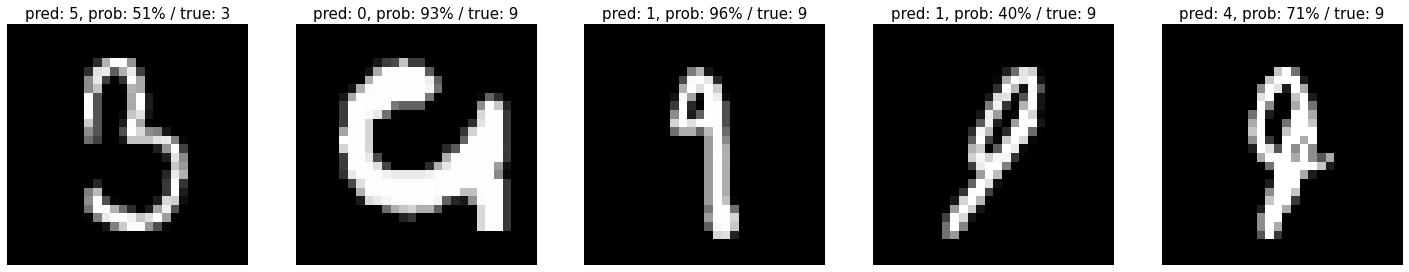

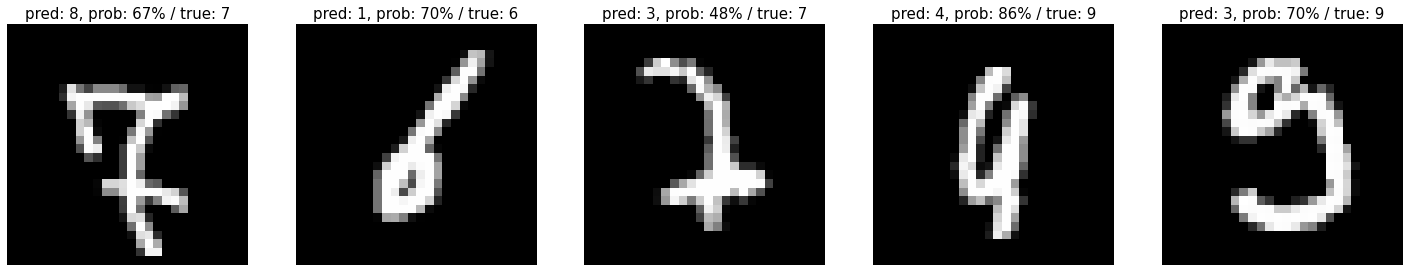

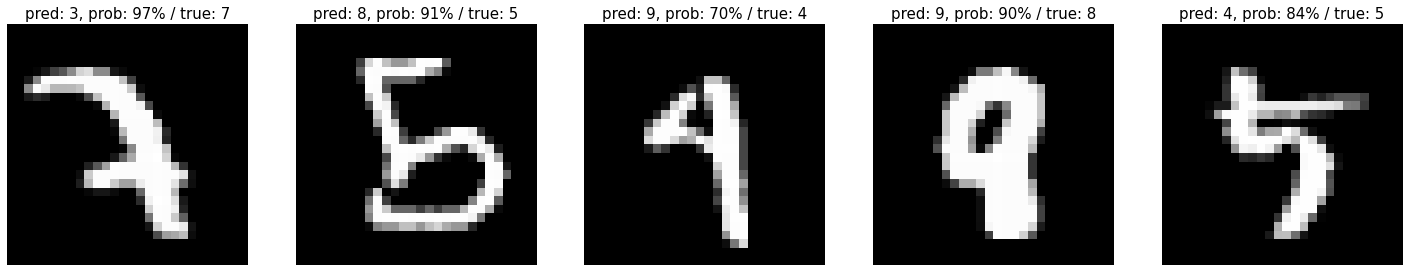

In [24]:
show_misclassified()

In [25]:
x_miscls = x_test[misclassified].reshape(-1,28,28,1)
preds = model.predict(x_miscls)

In [26]:
n= 5
x_miscls = x_test[misclassified].reshape(-1,28,28,1)
y_miscls = y_test[misclassified].reshape(-1,10)

idx_start = np.random.randint(len(x_miscls) - n)
preds = model.predict(x_miscls[idx_start:idx_start+5])
true_labels = y_miscls[idx_start:idx_start+5]
true_labels.shape

(5, 10)

## 2. Download the Street View House Numbers (SVHN) Dataset

- source: http://ufldl.stanford.edu/housenumbers/
- use the cropped dataset!
- to get the dataset use eg. wget and keep the original splitting, so download train and test matrix files
- preprocess the downloaded data to be able to use it for training and testing, so shapes should be same (except image sizes) as it was in ex 1.
- how many classes do we have in the dataset? how many train and test examples do we have?
- what is the dimension of the images?
- show 5 images from the dataset
- make one-hot encoding for the labels

In [27]:
from scipy.io import loadmat
#The diwn
test2 = loadmat("test_32x32.mat")
train2 = loadmat("train_32x32.mat")
#We can see, that the mat_dict object returned by loadmat has 5 keys, I'm going to use only X and y
test2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [28]:
x_test2,y_test2 = test2["X"], test2["y"]
x_train2,y_train2 = train2["X"], train2["y"]
print(x_test2.shape,y_test2.shape)
print(x_train2.shape,y_train2.shape)
print(np.unique(y_test2))

(32, 32, 3, 26032) (26032, 1)
(32, 32, 3, 73257) (73257, 1)
[ 1  2  3  4  5  6  7  8  9 10]


The training set has 73k elements, while the test set 26032. We want the desired shape of the x arrays to be like for example in the x_test2 case: (26032, 32,32,3).

In [29]:
#We have to move the last axis to the first place
x_test2 = np.moveaxis(x_test2, -1, 0)
x_train2 = np.moveaxis(x_train2, -1, 0)
x_test2.shape, x_train2.shape

((26032, 32, 32, 3), (73257, 32, 32, 3))

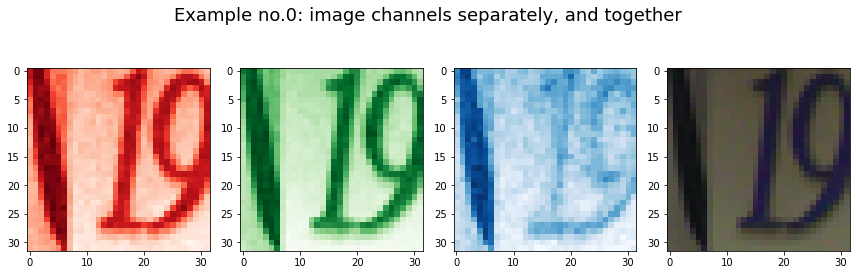

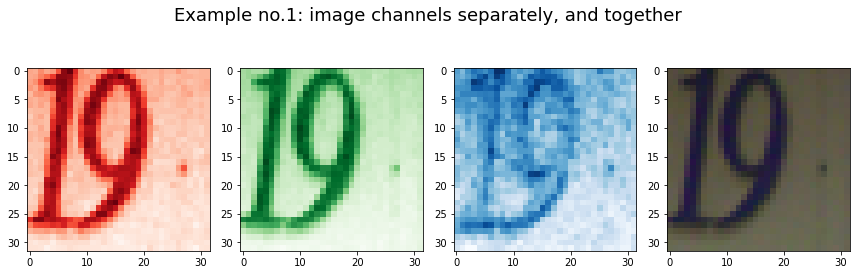

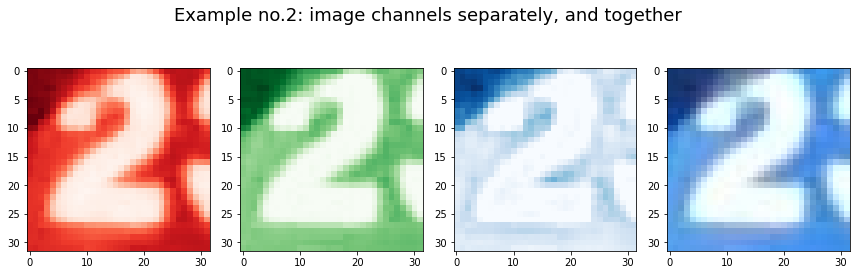

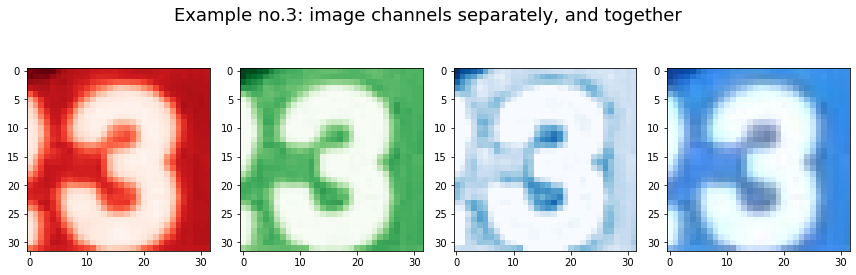

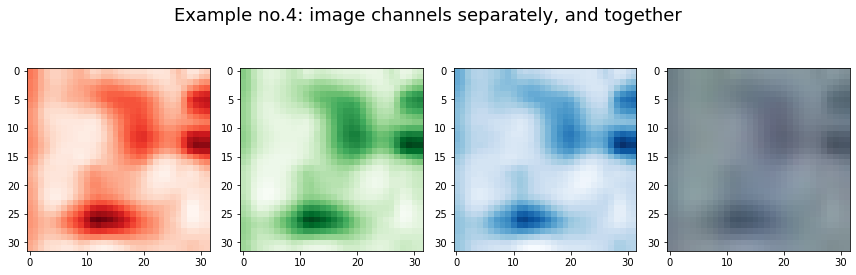

In [30]:
#Let's take a look at the data
for i in range(5):
    plt.figure(figsize=[12,4])
    plt.suptitle(f"Example no.{i}: image channels separately, and together",size=18)
    plt.subplot(141)
    plt.imshow(x_train2[i,:,:,0],cmap="Reds_r")
    plt.subplot(142)
    plt.imshow(x_train2[i,:,:,1],cmap="Greens_r")
    plt.subplot(143)
    plt.imshow(x_train2[i,:,:,2],cmap="Blues_r")
    plt.subplot(144)
    plt.imshow(x_train2[i,:,:,:])
    plt.tight_layout()

In [31]:
#It looks like we have 8 bit images
print(x_train2.max(), x_train2.min())
#Let's normalize them, we have to convert them because of memory issues
x_train2 = x_train2.astype("float16")/255
x_test2 = x_test2.astype("float16")/255

255 0


In [32]:
#One-hot encoding, also there is a 10 instead of 0
y_test2 = keras.utils.to_categorical(np.array([x if x != 10 else 0 for x in y_test2.flatten()]), 10)
y_train2 = keras.utils.to_categorical(np.array([x if x != 10 else 0 for x in y_train2.flatten()]), 10)

## 3. Train the CNN model seen in the 1st exercise for this dataset
* create a convolutional neural network
* the network should have the following layers:
        
        input (32, 32, 3)
        conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
        conv2D, 16 kernels, kernel size = 3, valid padding, relu actvation
        maxpooling kernel size = 2*2
        conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
        conv2D, 32 kernels, kernel size = 3, valid padding, relu actvation
        maxpooling kernel size = 2*2
        flatten
        dense, 10 neurons, softmax activation
        how many parameters do we have for each layer?

    * use Adam optimizer with default parameters
    * use categorical crossentropy as loss function
    * compile the model
    * print out a summary of the model
    * train the CNN on the training data for 15 epochs with batch size of 32
    * use the test data as validation data
- calculate the categorical cross-entropy loss and the accuracy! Hint: you should get at least ~80-90% accuracy

In [33]:
model2 = keras.Sequential([
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(16, kernel_size=(3, 3),padding="valid", activation="relu"),
        layers.Conv2D(16, kernel_size=(3, 3),padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
        ])

batch_size = 1000
epochs = 10

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model2.fit(x_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_data = (x_test2,y_test2))

Epoch 1/10
74/74 [==============================] - 48s 645ms/step - loss: 2.1718 - accuracy: 0.2213 - val_loss: 1.7384 - val_accuracy: 0.4449
Epoch 2/10
74/74 [==============================] - 48s 651ms/step - loss: 1.1539 - accuracy: 0.6441 - val_loss: 0.9294 - val_accuracy: 0.7266
Epoch 3/10
74/74 [==============================] - 48s 647ms/step - loss: 0.7523 - accuracy: 0.7813 - val_loss: 0.7225 - val_accuracy: 0.8027
Epoch 4/10
74/74 [==============================] - 48s 643ms/step - loss: 0.6491 - accuracy: 0.8142 - val_loss: 0.6668 - val_accuracy: 0.8201
Epoch 5/10
74/74 [==============================] - 48s 647ms/step - loss: 0.5866 - accuracy: 0.8344 - val_loss: 0.6334 - val_accuracy: 0.8316
Epoch 6/10
74/74 [==============================] - 48s 645ms/step - loss: 0.5488 - accuracy: 0.8456 - val_loss: 0.6168 - val_accuracy: 0.8355
Epoch 7/10
74/74 [==============================] - 48s 655ms/step - loss: 0.5209 - accuracy: 0.8537 - val_loss: 0.5988 - val_accuracy: 0.8413

In [34]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [35]:
model2.evaluate(x_test2,y_test2)

814/814 [==============================] - 6s 7ms/step - loss: 0.5389 - accuracy: 0.8574


[0.538851797580719, 0.8573678731918335]

## 4. Evaluate performance

- plot the training and the validation loss on the same plot!
- plot the training and the validation accuracy on the same plot!
- do we overfit?
- show the confusion matrix of the predictions (predicted values vs actual labels)
- where does the model make mistakes?

(1.0, 10.45)

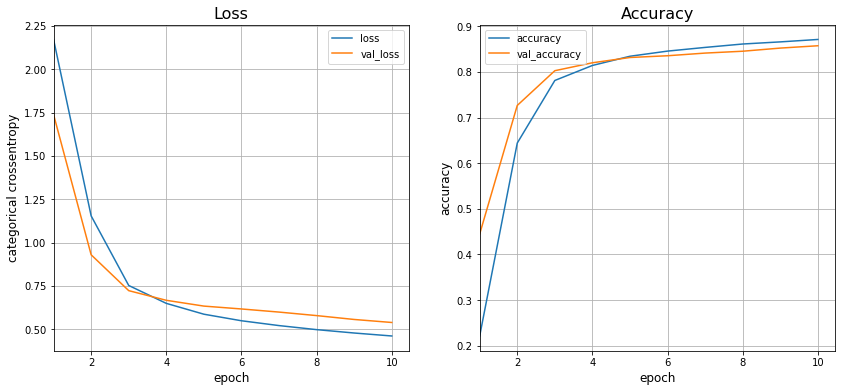

In [36]:
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.title("Loss", size=16)
plt.plot(np.arange(1,11),history2.history["loss"],label="loss")
plt.plot(np.arange(1,11),history2.history["val_loss"],label="val_loss")
plt.grid()
plt.xlabel("epoch",size=12)
plt.ylabel("categorical crossentropy",size=12)
plt.legend()
plt.xlim(1)

plt.subplot(122)
plt.title("Accuracy", size=16)
plt.plot(np.arange(1,11),history2.history["accuracy"],label="accuracy")
plt.plot(np.arange(1,11),history2.history["val_accuracy"],label="val_accuracy")
plt.grid()
plt.xlabel("epoch",size=12)
plt.ylabel("accuracy",size=12)
plt.legend()
plt.xlim(1)

Text(0.5, 1.0, 'SVHN - convolutinal network confusion matrix')

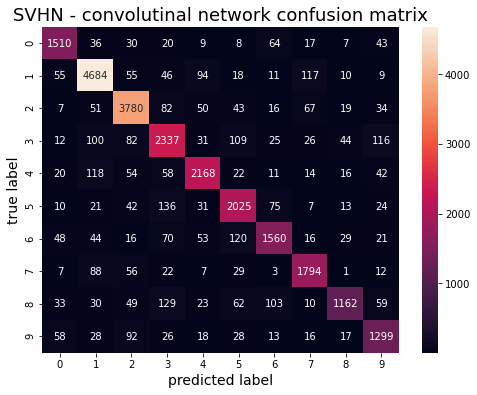

In [37]:
from sklearn.metrics import confusion_matrix
conf_matr4 = confusion_matrix( np.argmax(y_test2,axis=1), np.argmax(model2.predict(x_test2),axis=1))
conf_matr4 = pd.DataFrame(conf_matr4, index = np.arange(0,10), columns = np.arange(0,10))
plt.figure(figsize=[8,6])
sns.heatmap(conf_matr4, annot = True, fmt="d")
plt.xlabel("predicted label",size=14)
plt.ylabel("true label", size=14)
plt.title("SVHN - convolutinal network confusion matrix",size=18)

On the above graph, we can see, that the misclassification shows some tendencies. There are major flaws in the following cases: 1-7, 5-3, 3-8, 3-9. In the next task, I'm going to investigate if we can enhance the 

## 5. Train another CNN
- as we can see the previous architecture can be further improved
- come up with an architecture that can achieve more than 91% accuracy on the test set
- print out the summary for this model!
- plot the loss and accuracy curves for this model too!

In [41]:
model5 = keras.Sequential([
        keras.Input(shape=(32,32,3)),
        layers.Conv2D(16, kernel_size=(3, 3),padding="valid", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(16, kernel_size=(3, 3),padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(10, activation="softmax"),
        ])

batch_size = 100
epochs = 12

model5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history5 = model5.fit(x_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_data = (x_test2,y_test2))

Epoch 1/12
733/733 [==============================] - 113s 154ms/step - loss: 0.8605 - accuracy: 0.7231 - val_loss: 0.4857 - val_accuracy: 0.8538
Epoch 2/12
733/733 [==============================] - 103s 140ms/step - loss: 0.4676 - accuracy: 0.8579 - val_loss: 0.4634 - val_accuracy: 0.8629
Epoch 3/12
733/733 [==============================] - 89s 121ms/step - loss: 0.3953 - accuracy: 0.8829 - val_loss: 0.4057 - val_accuracy: 0.8778
Epoch 4/12
733/733 [==============================] - 105s 143ms/step - loss: 0.3494 - accuracy: 0.8974 - val_loss: 0.3551 - val_accuracy: 0.8945
Epoch 5/12
733/733 [==============================] - 112s 153ms/step - loss: 0.3204 - accuracy: 0.9045 - val_loss: 0.3428 - val_accuracy: 0.8992
Epoch 6/12
733/733 [==============================] - 120s 164ms/step - loss: 0.2979 - accuracy: 0.9123 - val_loss: 0.3019 - val_accuracy: 0.9141
Epoch 7/12
733/733 [==============================] - 111s 151ms/step - loss: 0.2787 - accuracy: 0.9179 - val_loss: 0.3197 - 

In [39]:
model5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 32)       

So, in the network architecture above, I used two additional elements: two batch normalization layers between the convolutional layers and an additional dense layer with 100 units before the final classification. <br>
The reason for the batch normalization lies within the usefulness of data preprocessing, but we apply it two more times in between layers. However, the values from the layer before changes, this way we can control the distribution (by setting it to a universal mean and  $\sigma$) of these values, as well as the loss and so can we control the gradient. The result is a more stable gradient, allowing us to train deeper networks more accurately. <br>


(1.0, 12.55)

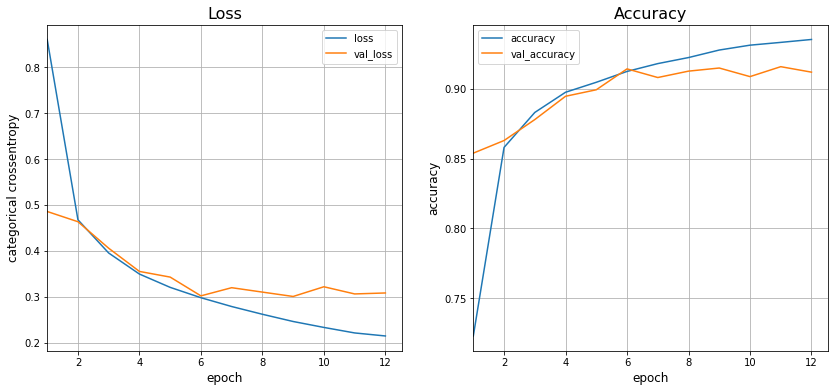

In [43]:
plt.figure(figsize=[14,6])
plt.subplot(121)
plt.title("Loss", size=16)
plt.plot(np.arange(1,13),history5.history["loss"],label="loss")
plt.plot(np.arange(1,13),history5.history["val_loss"],label="val_loss")
plt.grid()
plt.xlabel("epoch",size=12)
plt.ylabel("categorical crossentropy",size=12)
plt.legend()
plt.xlim(1)

plt.subplot(122)
plt.title("Accuracy", size=16)
plt.plot(np.arange(1,13),history5.history["accuracy"],label="accuracy")
plt.plot(np.arange(1,13),history5.history["val_accuracy"],label="val_accuracy")
plt.grid()
plt.xlabel("epoch",size=12)
plt.ylabel("accuracy",size=12)
plt.legend()
plt.xlim(1)